# Aula 12 - Multi-Armed Bandits - 10-armed testbed - Exercícios

Os exercícios dessa semana consistem em auxiliar na interpretação do código do 10-armed testbed framework, visto em sala, a fim de entender o funcionamento dos três algoritmos principais de MAB: Epsilon Greedy, UCB1 e Thompson Sampling.

Estude o código da aula (Aula12_Exemplos.ipynb) procurando relacionar o código com os slides da aula. O código está separado por classes para facilitar o entendimento:

- **Classe Testbed:**  Contém as ações possíveis (braços do MAB), suas distribuições e o braço considerado a ação ótima (maior recompensa). 
- **Classe Agent:** Classe pai para os demais algoritmos MAB. Possui algumas funções de uso comum, como reset(), interpreter() e exploit().
- **Classe Random:** Algoritmo MAB que realiza a escolha aleatória de uma ação (somente explora). 
- **Classe ExploreOnce:** Algoritmo MAB que escolhe aleatoriamente cada ação possível uma única vez e depois somente explota.
- **Classe Epsilon:** Algoritmo MAB que usa um fator epsilon para decidir entre explorar e explotar.
- **Classe ExploreSteps:** Algoritmo MAB que realiza um número fixo de jogadas na fase exploração e depois somente explota.
- **Classe UCB1:** Implementação do algoritmo UCB1.
- **Classe Thompson:** Implementação do algoritmo Thompson Sampling.
- **Classe Environment:** Classe que contém o loop principal de iterações, jogadas e controla o Testbed e os algoritmos MAB.

***

**Exercício 01:** Explique o que representa os valores contidos na variável actArr da classe Testbed. Utilize os slides da aula para auxiliar na sua resposta.

A variável `actArr` armazena a recompensa esperada de cada ação, inicializada assumindo que ela segue uma distribuição normal. Essa probabilidade é desconhecida para cada algoritmo, mas conhecida pelo testBed.

Conforme realizamos diferentes escolhas de braços e ações, modificamos a distribuição da recompensa esperada para uma certa ação, modificando o valor armazenado na variável `actArr`

***

**Exercício 02:** Explique o funcionamento da função action() da classe Epsilon.

Em um algoritmo Epsilon-greedy, escolhemos explorar com probabilidade epsilon e explotar com probabilidade (1-epsilon).  Isso é implementado gerando um número aleatório entre 0 e 1 e definindo Epsilon como um limite. Em outras palavras, calculamos $P(X \leq \epsilon)$, onde X é a variável aleatória. No caso da exploração ($P(X \leq \epsilon)$, o método escolhe uma ação aleatória. Do contrário ( $P(X > \epsilon)$ ou $1 - P(X \leq \epsilon)$ )o modelo explota escolhendo a ação com maior recompensa conhecida.

***

**Exercício 03:** Explique o funcionamento das funções action() e interpreter() da classe Thompson.

A função `interpreter()` controla o número de sucessos e fracassos (ou seja, o número de ações que receberam uma recompensa positiva - um feedback de clique, por exemplo - e recompensas negativas).

Essa informação, por sua vez, é utilizada na função `action()`. Uma função de densidade de probabilidade (f.d.p) beta possui dois parâmetros: $\alpha$ e $\beta$ e a combinação dos dois valores controla o formato da função beta, gerando uma função de densidade de probabilidade. 

Quanto maior beta em relação a alfa, mais deslocada para a esquerda a probabilidade gerada. E quanto maior a diferença de alfa em relação a beta, mais a direita a curva. Quando falamos de mais a direita ou mais a esquerda, estamos falando de quão concentrada está a função de probabilidade em valores maiores ou menores: uma f.d.p deslocada para a esquerda representa uma distribuição que possui alta probabilidade de retornar valores pequenos; uma f.d.p deslocada para a direita tem maior probabilidade de retornar valores mais altos. 

O que isso significa no contexto de Multi armed bandits é que conforme aumentamos a quantidade de fracassos (representado por beta), maior a probabilidade dessa ação retornar uma recompensa baixa. Isso é representado na figura abaixo, onde represento um cenário de 5 sucessos com o número de fracassos aumentando sucessivamente, ate atingirmos a = 5 e b = 10. Note que conforme aumentamos b, maior a probabilidade da ação retornar uma recompensa baixa. Note que p(x) não é a probabilidade do valor x, e sim a função densidade de probabilidade. Por isso, no exemplo abaixo, podemos obter p(x) > 1.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def plota_beta(alfas, betas):
    x = np.linspace(0, 1, 100)
    plt.figure(figsize=(10, 6))
    
    for alfa, b in zip(alfas, betas):
        y = beta.pdf(x, alfa, b)
        plt.plot(x, y, label=f'α={alfa}, β={b}')
    
    plt.title('Distribuições Beta para Diferentes Valores de alfa e beta')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.legend()
    plt.grid(True)
    plt.show()


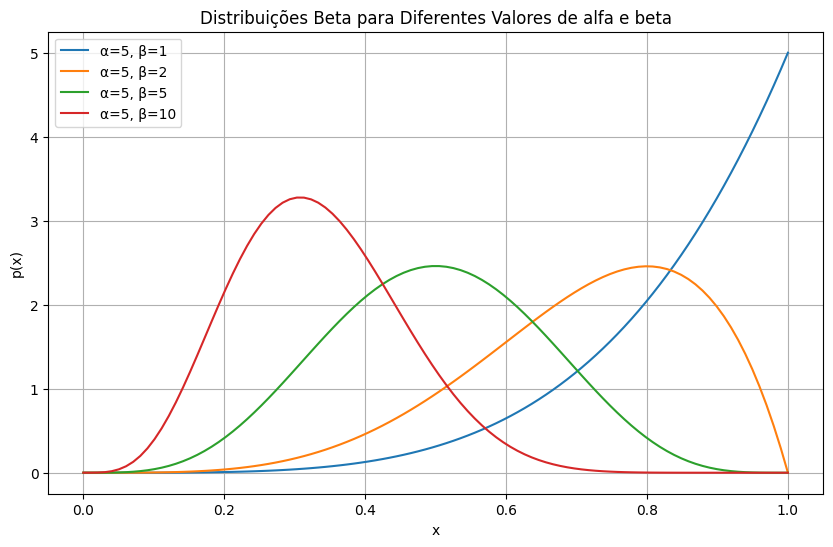

In [17]:

alphas = [5, 5, 5, 5]
betas = [1, 2, 5, 10]

plota_beta(alphas, betas)

***

**Exercício 04:** Explique resumidamente o funcionamento da função play() da classe Environment. 

Essencialmente, a função `play()` faz cada agente interagir com o ambiente, registrando a recomensa obtida e quantas vezes o agente tomou a ação ótima. O método realiza isso por um número fixo de jogadas. Ao final, retorna a média de recompensas obtidas e a média de recompensas ótimas obtidas.

***

**Exercício 05:** Dado o último gráfico do exemplo, que contém o desempenho dos algoritmos UCB1, Thompson, Epsilon e EpsilonSteps, explique por que depois de um número de jogadas, o Epsilon Steps mantém um valor de % de ação ótima constante. 

Porque após um número $\epsilon$ de jogadas, o método EpsilonSteps só explota, ele não explora. A consequência disso é que o número de jogadas ótimas se torna constante. Isso porque o epsilonSteps corre o risco de cair em uma solução subótima e se manter nela. ISso não ocorre em algoritmos como o UCB1 que seguem explorando, porém, refinando as escolhas em relação a escolhas passadas.